# San Diego Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"/home/scc/miranda.barros-everett/sandi_census_2021_2022.csv")
# r"C:\Users\miric\Desktop\dlss_local\sandi_census_2021_2022.csv"

In [4]:
df.head()

,Date,NIBRS,Crime Against Category,Beat,Zip Code,Year,Month,Season,DayOfWeek,Hour,...,Below poverty level,geometry,temperature_2m_hour,apparent_temperature_hour,precipitation_hour,rain_hour,snowfall_hour,cloud_cover_hour,wind_speed_100m_hour,is_day_hour
0,2021-01-01 00:00:01,290,Property,115,92122,2021,1,Winter,4,0,...,9641,MULTIPOLYGON (((-117.19641022551755 32.8713125...,14.728,12.378162,0.0,0.0,0.0,0.0,25.488914,1.0
1,2021-01-01 00:00:01,290,Property,623,92108,2021,1,Winter,4,0,...,2114,MULTIPOLYGON (((-117.10148831324379 32.7893030...,14.728,12.378162,0.0,0.0,0.0,0.0,25.488914,1.0
2,2021-01-01 00:00:01,290,Property,527,92101,2021,1,Winter,4,0,...,5708,MULTIPOLYGON (((-117.17864856105622 32.7395756...,14.728,12.378162,0.0,0.0,0.0,0.0,25.488914,1.0
3,2021-01-01 00:00:01,23F,Property,115,92122,2021,1,Winter,4,0,...,9641,MULTIPOLYGON (((-117.19641022551755 32.8713125...,14.728,12.378162,0.0,0.0,0.0,0.0,25.488914,1.0
4,2021-01-01 00:00:01,23H,Property,934,92130,2021,1,Winter,4,0,...,2638,MULTIPOLYGON (((-117.20676894642604 32.9791256...,14.728,12.378162,0.0,0.0,0.0,0.0,25.488914,1.0


In [5]:
#missing values?
na_count = df.isna().sum()
print(na_count)

Date                         0
NIBRS                        0
Crime Against Category       0
Beat                         0
Zip Code                     0
Year                         0
Month                        0
Season                       0
DayOfWeek                    0
Hour                         0
Category                     0
Description                  0
Primary Type                 0
Beat Name                    0
UNEMP                        0
TOT_POP                      0
Below poverty level          0
geometry                     0
temperature_2m_hour          0
apparent_temperature_hour    0
precipitation_hour           0
rain_hour                    0
snowfall_hour                0
cloud_cover_hour             0
wind_speed_100m_hour         0
is_day_hour                  0
dtype: int64


In [6]:
#clean datatypes
print(df.dtypes)

df['Date'] = pd.to_datetime(df['Date'])
categorical_columns = ['Season', 'Primary Type', 'Category', 'Crime Against Category'] # no community name in df
df[categorical_columns] = df[categorical_columns].astype('category')

Date                          object
NIBRS                         object
Crime Against Category        object
Beat                           int64
Zip Code                       int64
Year                           int64
Month                          int64
Season                        object
DayOfWeek                      int64
Hour                           int64
Category                      object
Description                   object
Primary Type                  object
Beat Name                     object
UNEMP                        float64
TOT_POP                        int64
Below poverty level            int64
geometry                      object
temperature_2m_hour          float64
apparent_temperature_hour    float64
precipitation_hour           float64
rain_hour                    float64
snowfall_hour                float64
cloud_cover_hour             float64
wind_speed_100m_hour         float64
is_day_hour                  float64
dtype: object


# Descriptive Stats

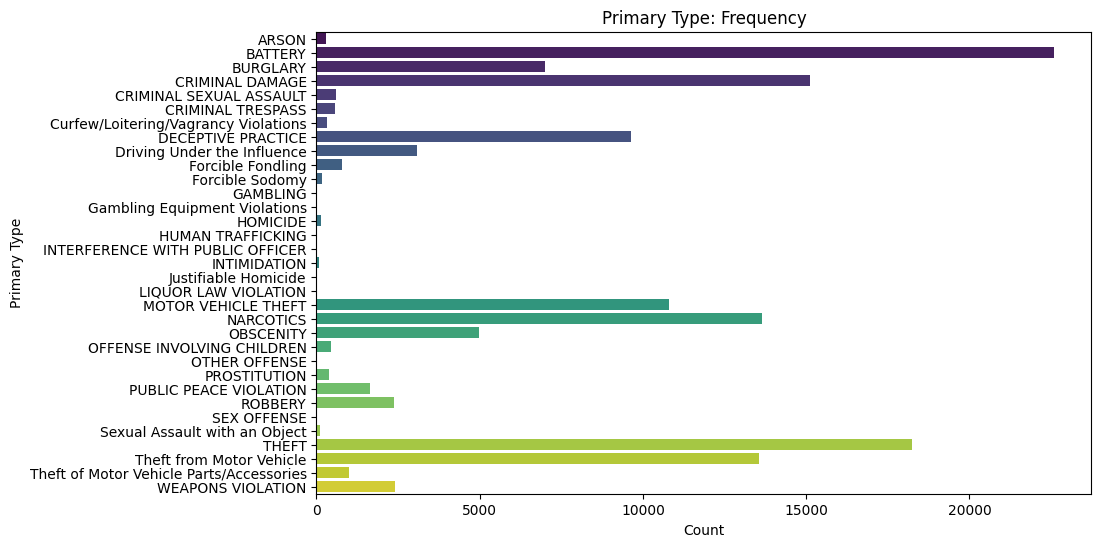

In [7]:
#frequencies primary type
pt_freq = df['Primary Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=pt_freq.values, y=pt_freq.index, palette='viridis')
plt.title('Primary Type: Frequency')
plt.xlabel('Count')
plt.ylabel('Primary Type')
plt.show()

# Opposite to Chicago in terms of battery and theft, San Diego: Battery > Theft, Chicago: Theft > Battery. These two crime types
# still the two highest types in both cities

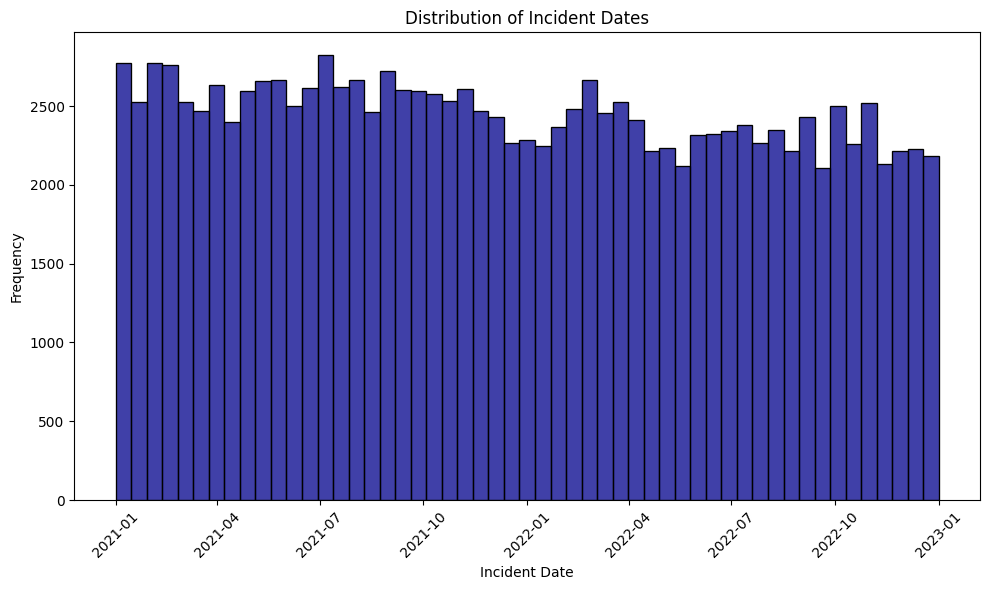

In [8]:
#number of crimes by week
plt.figure(figsize=(10, 6))
sns.histplot(df['Date'], kde=False, bins=53, color='darkblue')
plt.title('Distribution of Incident Dates')
plt.xlabel('Incident Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

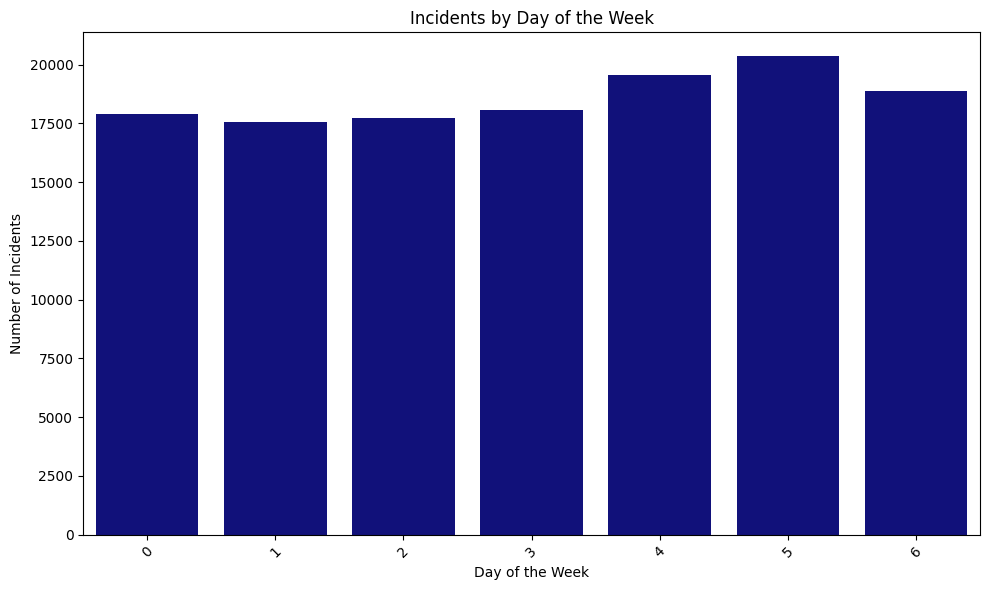

In [9]:
#number of crimes by day
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, color='darkblue')
plt.title('Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()

# Chicaco also peaks on weekend days

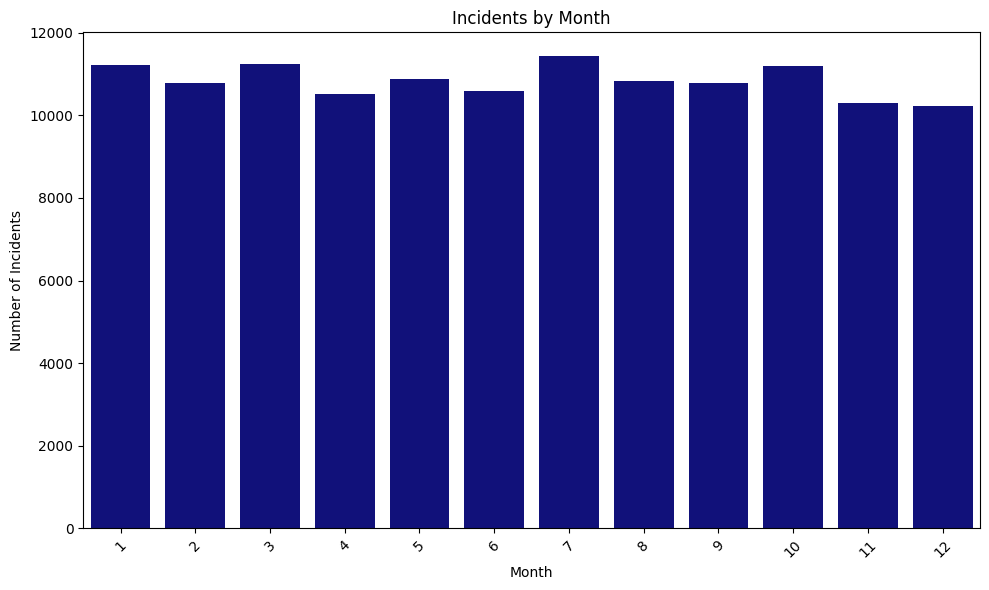

In [10]:
#number of crimes by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, color='darkblue')
plt.title('Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()

# Same month peak as Chicago

## Adding the districs based on sandiego.gov file
https://www.sandiego.gov/sites/default/files/list_of_san_diego_city_council_districts_by_zip_code.pdf

In [11]:
# Define the mapping of ZIP codes to districts
zip_to_district = {
    92014: 1, 92037: 1, 92038: 1, 92067: 1, 92093: 1, 92121: 1, 92122: 1, 92130: 1,  # District 1
    92117: 2, 92111: 2, 92109: 2, 92108: 2, 92107: 2, 92106: 2,  # District 2
    92101: 3, 92102: 3, 92103: 3, 92104: 3, 92105: 3, 92110: 3, 92116: 3, 92132: 3, 92134: 3,  # District 3
    92102: 4, 92105: 4, 92113: 4, 92114: 4, 92115: 4, 92139: 4,  # District 4
    92127: 5, 92128: 5, 92129: 5, 92131: 5,  # District 5
    92111: 6, 92117: 6, 92121: 6, 92123: 6, 92126: 6, 92129: 6, 92145: 6,  # District 6
    92108: 7, 92111: 7, 92119: 7, 92120: 7, 92123: 7, 92124: 7, 92171: 7,  # District 7
    92102: 8, 92113: 8, 92154: 8, 92173: 8,  # District 8
    92102: 9, 92104: 9, 92105: 9, 92113: 9, 92115: 9, 92116: 9   # District 9
}

In [15]:
# Create a new column 'District' based on the ZIP code
df['District'] = df['Zip Code'].map(zip_to_district)

# Check the DataFrame to ensure the mapping worked
print(df[['Zip Code', 'District']].head())

# Find rows where 'District' is NaN
missing_districts = df[df['District'].isna()]
print(missing_districts)

# Optionally, you can drop these rows or fill them with a default value
print("Dataframe length before dropping columns with no assigned district:", len(df))
df.dropna(subset=['District'], inplace=True)
print("Dataframe length after dropping columns with no assigned district:", len(df))

# Convert 'District' column values to integers
df['District'] = df['District'].astype(int)

   Zip Code  District
0     92122         1
1     92108         7
2     92101         3
3     92122         1
4     92130         1
Empty DataFrame
Columns: [Date, NIBRS, Crime Against Category, Beat, Zip Code, Year, Month, Season, DayOfWeek, Hour, Category, Description, Primary Type, Beat Name, UNEMP, TOT_POP, Below poverty level, geometry, temperature_2m_hour, apparent_temperature_hour, precipitation_hour, rain_hour, snowfall_hour, cloud_cover_hour, wind_speed_100m_hour, is_day_hour, District]
Index: []

[0 rows x 27 columns]
Dataframe length before dropping columns with no assigned district: 129725
Dataframe length after dropping columns with no assigned district: 129725


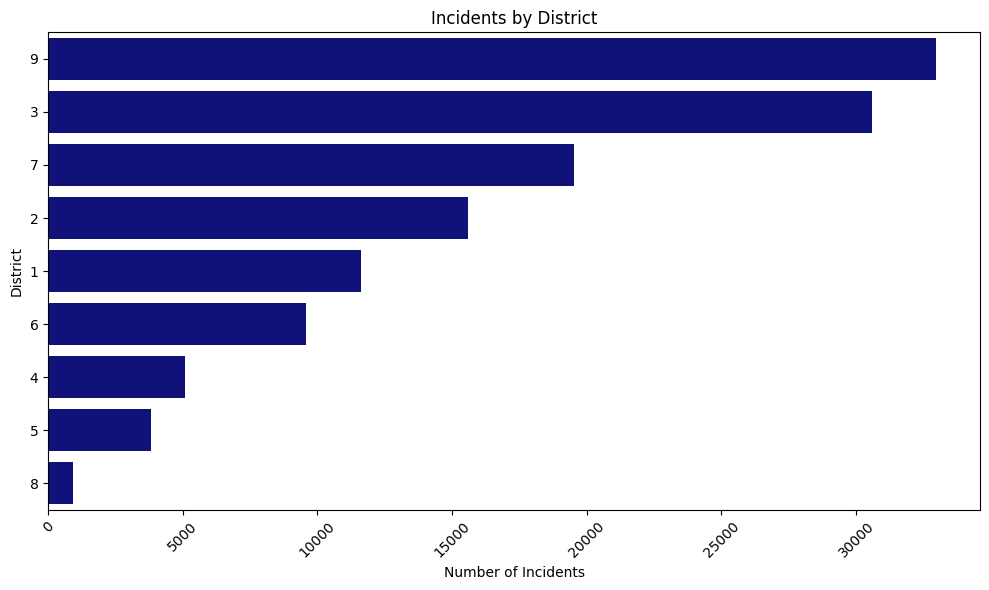

In [16]:
#no districs, see by zip code instead
plt.figure(figsize=(10, 6))

order = df['District'].value_counts().index
sns.countplot(y='District', data=df, order=order, color='darkblue')
plt.title('Incidents by District')
plt.xlabel('Number of Incidents')
plt.ylabel('District')
plt.xticks(rotation=45)
plt.tight_layout()